<a href="https://colab.research.google.com/github/mcleantom/makemore_from_scratch/blob/main/makemore.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Makes more things like it... character level language model

In [ ]:
words = open('names.txt', 'r').read().splitlines()

In [ ]:
words[:10]

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn']

In [18]:
import torch

In [26]:
N = torch.zeros((27, 27), dtype=torch.int32)

In [25]:
chars = sorted(list(set(''.join(words))))
stoi = {s: i+1 for i, s in enumerate(chars)}
stoi['.'] = 0
itos = {i: s for s, i in stoi.items()}

In [27]:
for w in words:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    N[ix1, ix2] += 1

In [53]:
P = (N+1).float()  # + 1 means that combinations that dont exist in the dataset (i.e aj) get atleast 1 count (model smoothing)
P = P / P.sum(1, keepdim=True)

In [54]:
g = torch.Generator().manual_seed(2147483647)

for _ in range(20):
  out = []
  ix = 0
  while True:
    p = P[ix]
    ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
    out.append(itos[ix])
    if ix == 0:
      break
  print(''.join(out))

mor.
axx.
minaymoryles.
kondlaisah.
anchshizarie.
odaren.
iaddash.
h.
jhinatien.
egushl.
h.
br.
a.
jayn.
ilemannariaenien.
be.
f.
akiinela.
trttanakeroruceyaaxatona.
lamoynayrkiedengin.


Goal is to maximize the likeleyhood of the data w.r.t. model parameters (statistical modeling)

1. Equivalent to maximizing the log likelyhood

2. Equivalent to minimizing the negative log likelyhood

3. Equivalent to minimizing the average negative log likelyhood

In [56]:
# Create the training set of all the bigrams
xs, ys = [], []

for w in words:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    xs.append(ix1)
    ys.append(ix2)

xs = torch.tensor(xs)
ys = torch.tensor(ys)

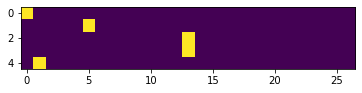

In [61]:
import torch.nn.functional as F
import matplotlib.pyplot as plt
xenc = F.one_hot(xs, num_classes=27).float()
plt.imshow(xenc)

In [68]:
W = torch.randn((27, 27))
logits = (xenc @ W)  # log-counts
counts = logits.exp()
probs = counts / counts.sum(1, keepdims=True) 
probs  ## Last two lines is called softmax

tensor([[0.0256, 0.0355, 0.0219, 0.0086, 0.0062, 0.0456, 0.0604, 0.0934, 0.0544,
         0.0303, 0.1084, 0.0227, 0.0180, 0.0511, 0.0445, 0.0171, 0.0289, 0.0946,
         0.0329, 0.0142, 0.0437, 0.0073, 0.0725, 0.0082, 0.0120, 0.0255, 0.0166],
        [0.0644, 0.0377, 0.0068, 0.0961, 0.0516, 0.0441, 0.0210, 0.0643, 0.0147,
         0.0320, 0.0210, 0.0161, 0.0362, 0.0161, 0.0728, 0.0731, 0.0457, 0.0224,
         0.0478, 0.0150, 0.0919, 0.0065, 0.0519, 0.0193, 0.0073, 0.0180, 0.0060],
        [0.0155, 0.0384, 0.0181, 0.0414, 0.0603, 0.0332, 0.1021, 0.0949, 0.1659,
         0.0200, 0.0084, 0.0562, 0.0130, 0.0060, 0.0229, 0.0193, 0.0092, 0.0137,
         0.1158, 0.0290, 0.0062, 0.0153, 0.0040, 0.0232, 0.0073, 0.0096, 0.0511],
        [0.0155, 0.0384, 0.0181, 0.0414, 0.0603, 0.0332, 0.1021, 0.0949, 0.1659,
         0.0200, 0.0084, 0.0562, 0.0130, 0.0060, 0.0229, 0.0193, 0.0092, 0.0137,
         0.1158, 0.0290, 0.0062, 0.0153, 0.0040, 0.0232, 0.0073, 0.0096, 0.0511],
        [0.0465, 0.0064,

In [71]:
xs, ys = [], []

for w in words:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    xs.append(ix1)
    ys.append(ix2)

xs = torch.tensor(xs)
ys = torch.tensor(ys)

In [77]:
## NN
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator=g, requires_grad=True)
num = xs.nelement()

for k in range(100):
  xenc = F.one_hot(xs, num_classes=27).float()
  logits = xenc @ W
  counts = logits.exp()
  probs = counts / counts.sum(1, keepdims=True)
  loss = -probs[torch.arange(num), ys].log().mean() + 0.01*(W**2).mean()
  print(loss.item())
  # backward pass
  W.grad = None
  loss.backward()

  W.data += -50 * W.grad

3.7686190605163574
3.3788065910339355
3.16109037399292
3.0271859169006348
2.9344842433929443
2.867231607437134
2.8166542053222656
2.777146339416504
2.7452542781829834
2.7188303470611572
2.696505546569824
2.6773719787597656
2.6608052253723145
2.6463515758514404
2.633664846420288
2.622471570968628
2.6125476360321045
2.6037068367004395
2.595794916152954
2.5886809825897217
2.5822560787200928
2.5764293670654297
2.5711236000061035
2.5662729740142822
2.5618228912353516
2.5577263832092285
2.5539441108703613
2.550442695617676
2.5471925735473633
2.5441696643829346
2.5413522720336914
2.538722038269043
2.536262035369873
2.5339581966400146
2.531797409057617
2.529768228530884
2.527859926223755
2.5260636806488037
2.5243701934814453
2.522773265838623
2.52126407623291
2.519836902618408
2.5184857845306396
2.5172054767608643
2.515990734100342
2.5148372650146484
2.5137407779693604
2.512697696685791
2.511704921722412
2.5107581615448
2.509854555130005
2.5089924335479736
2.5081682205200195
2.507380485534668
